## **Informations**

**Principal objetivo:** prever HOT 100

## **1. Importing data**

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'top-spotify-songs-in-73-countries-daily-updated:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3905195%2F9103612%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240805%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240805T114510Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6940fb1fc74a4b7923c418e93076388f2bdebd07c3c66590c7971670b3c66f9fc1c0561ee3723e963bd43d0c0411f70ad8ca088d1e414e64dfe86c662ba97976190ba8133529a4cc29dca7fd76541c8ef04a126a7675ab359bd985e589f204326a8d982cc4f5e004383f87a719a2581b41acdfbb0a60316cd4781851d5685298351d485b5a9d8ca7baab198bc56230cc428ba0d30439c3172edeb708c3f722e2d99ad9e0acd939cf80a01c3fc14f2638f0fb0ab3023d390cf2a7997e721f73c422aadbd409f233cfee4908293d04ce3b9d622499e58ea95ba950ca29650e92f84918c1b66547b4a380c33f01780b56e157f338984673b0f252c2a164c90f9743'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 85138381 bytes downloaded
Downloaded and uncompressed: top-spotify-songs-in-73-countries-daily-updated
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-in-73-countries-daily-updated/universal_top_spotify_songs.csv


In [3]:
data = pd.read_csv("/kaggle/input/top-spotify-songs-in-73-countries-daily-updated/universal_top_spotify_songs.csv")

In [4]:
data.head(11)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7tI8dRuH2Yc6RuoTjxo4dU,Who,Jimin,1,0,0,NaN,2024-08-04,93,False,...,0,-3.743,0,0.0320,0.00289,0.000000,0.1930,0.838,116.034,4
1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,2,0,0,NaN,2024-08-04,99,False,...,2,-10.171,1,0.0358,0.20000,0.060800,0.1170,0.438,104.978,4
2,2qSkIjg1o9h3YT9RAgYN75,Espresso,Sabrina Carpenter,3,1,0,NaN,2024-08-04,99,True,...,0,-5.478,1,0.0285,0.10700,0.000065,0.1850,0.690,103.969,4
3,5N3hjp1WNayUPZrA8kJmJP,Please Please Please,Sabrina Carpenter,4,1,0,NaN,2024-08-04,98,True,...,9,-6.073,1,0.0540,0.27400,0.000000,0.1040,0.579,107.071,4
4,6WatFBLVB0x077xWeoVc2k,Si Antes Te Hubiera Conocido,KAROL G,5,1,1,NaN,2024-08-04,95,False,...,11,-6.795,1,0.0469,0.44600,0.000594,0.0678,0.787,128.027,4
5,3WOhcATHxK2SLNeP5W3v1v,Guess featuring Billie Eilish,"Charli xcx, Billie Eilish",6,-3,44,NaN,2024-08-04,79,False,...,7,-6.622,1,0.0983,0.01460,0.300000,0.0761,0.618,130.019,4
6,0WbMK4wrZ1wFSty9F7FCgu,"Good Luck, Babe!",Chappell Roan,7,0,1,NaN,2024-08-04,96,False,...,11,-5.960,0,0.0356,0.05020,0.000000,0.0881,0.785,116.712,4
7,6XjDF6nds4DE2BBbagZol6,Gata Only,"FloyyMenor, Cris Mj",8,0,-3,NaN,2024-08-04,96,True,...,8,-8.472,0,0.0509,0.44600,0.000024,0.0899,0.669,99.986,4
8,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,Kendrick Lamar,9,0,-2,NaN,2024-08-04,97,True,...,1,-7.001,1,0.0776,0.01070,0.000000,0.1410,0.214,101.061,4
9,3xkHsmpQCBMytMJNiDf3Ii,Beautiful Things,Benson Boone,10,0,-1,NaN,2024-08-04,91,False,...,10,-5.692,1,0.0603,0.15100,0.000000,0.1400,0.219,105.029,3


## **2. Understanding the data**

In [5]:
data.shape

(1051703, 25)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051703 entries, 0 to 1051702
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   spotify_id          1051703 non-null  object 
 1   name                1051676 non-null  object 
 2   artists             1051676 non-null  object 
 3   daily_rank          1051703 non-null  int64  
 4   daily_movement      1051703 non-null  int64  
 5   weekly_movement     1051703 non-null  int64  
 6   country             1037446 non-null  object 
 7   snapshot_date       1051703 non-null  object 
 8   popularity          1051703 non-null  int64  
 9   is_explicit         1051703 non-null  bool   
 10  duration_ms         1051703 non-null  int64  
 11  album_name          1051160 non-null  object 
 12  album_release_date  1051308 non-null  object 
 13  danceability        1051703 non-null  float64
 14  energy              1051703 non-null  float64
 15  key            

In [7]:
data.isnull().sum()

,0
spotify_id,0
name,27
artists,27
daily_rank,0
daily_movement,0
weekly_movement,0
country,14257
snapshot_date,0
popularity,0
is_explicit,0


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
daily_rank,1051703.0,25.489112,14.428281,1.000000,13.0000,25.000000,38.000000,50.000
daily_movement,1051703.0,0.785222,6.704156,-49.000000,-1.0000,0.000000,2.000000,49.000
weekly_movement,1051703.0,2.599860,11.957581,-49.000000,-3.0000,0.000000,5.000000,49.000
popularity,1051703.0,76.800095,16.022041,0.000000,66.0000,81.000000,89.000000,100.000
duration_ms,1051703.0,192839.087481,50531.232414,0.000000,160517.0000,185238.000000,217644.000000,939666.000
danceability,1051703.0,0.685487,0.137628,0.000000,0.5950,0.704000,0.789000,0.988
energy,1051703.0,0.650967,0.163037,0.000020,0.5510,0.671000,0.764000,0.998
key,1051703.0,5.504828,3.566254,0.000000,2.0000,6.000000,9.000000,11.000
loudness,1051703.0,-6.458082,2.605122,-37.334000,-7.8050,-6.005000,-4.750000,3.233
mode,1051703.0,0.540240,0.498378,0.000000,0.0000,1.000000,1.000000,1.000


In [9]:
data.describe(include=[object]).T

,count,unique,top,freq
spotify_id,1051703,13482,3rUGC1vUpkDG9CZFHMur1t,8389
name,1051676,12325,greedy,8389
artists,1051676,8243,Taylor Swift,17419
country,1037446,72,DO,14525
snapshot_date,1051703,290,2024-03-16,3942
album_name,1051160,9310,nadie sabe lo que va a pasar mañana,15936
album_release_date,1051308,2019,2023-10-13,22606


Limpeza dos dados

In [10]:
data = data.dropna(subset=['name', 'artists','album_name', 'album_release_date'])
data = data.fillna(' ')

## **3. Exploratory Data Analysis**

### 3.1. Popular artists per country

In [11]:
country_codes = {
    ' ': 'Unknown',
    'ZA': 'South Africa',
    'VN': 'Vietnam',
    'VE': 'Venezuela',
    'UY': 'Uruguay',
    'US': 'United States',
    'UA': 'Ukraine',
    'TW': 'Taiwan',
    'TR': 'Turkey',
    'TH': 'Thailand',
    'SV': 'El Salvador',
    'SK': 'Slovakia',
    'SG': 'Singapore',
    'SE': 'Sweden',
    'SA': 'Saudi Arabia',
    'RO': 'Romania',
    'PY': 'Paraguay',
    'PT': 'Portugal',
    'PL': 'Poland',
    'PK': 'Pakistan',
    'PH': 'Philippines',
    'PE': 'Peru',
    'PA': 'Panama',
    'NZ': 'New Zealand',
    'NO': 'Norway',
    'NL': 'Netherlands',
    'NI': 'Nicaragua',
    'NG': 'Nigeria',
    'MY': 'Malaysia',
    'MX': 'Mexico',
    'MA': 'Morocco',
    'LV': 'Latvia',
    'LU': 'Luxembourg',
    'LT': 'Lithuania',
    'KZ': 'Kazakhstan',
    'KR': 'South Korea',
    'JP': 'Japan',
    'IT': 'Italy',
    'IS': 'Iceland',
    'IN': 'India',
    'IL': 'Israel',
    'IE': 'Ireland',
    'ID': 'Indonesia',
    'HU': 'Hungary',
    'HN': 'Honduras',
    'HK': 'Hong Kong',
    'GT': 'Guatemala',
    'GR': 'Greece',
    'GB': 'United Kingdom',
    'FR': 'France',
    'FI': 'Finland',
    'ES': 'Spain',
    'EG': 'Egypt',
    'EE': 'Estonia',
    'EC': 'Ecuador',
    'DO': 'Dominican Republic',
    'DK': 'Denmark',
    'DE': 'Germany',
    'CZ': 'Czech Republic',
    'CR': 'Costa Rica',
    'CO': 'Colombia',
    'CL': 'Chile',
    'CH': 'Switzerland',
    'CA': 'Canada',
    'BY': 'Belarus',
    'BR': 'Brazil',
    'BO': 'Bolivia',
    'BG': 'Bulgaria',
    'BE': 'Belgium',
    'AU': 'Australia',
    'AT': 'Austria',
    'AR': 'Argentina',
    'AE': 'United Arab Emirates'
}

In [12]:
data['country_names'] = data['country'].map(country_codes)
data['artist_song'] = data['artists'] + ' - ' + data['name']

In [13]:
idx = data.groupby('country')['popularity'].idxmax()
pop_artist_per_country = data.loc[idx, ['artists', 'name', 'country', 'country_names', "artist_song", 'popularity']].reset_index(drop=True)

In [14]:
import plotly.express as px

In [15]:
fig = px.choropleth(
    data_frame=pop_artist_per_country,
    locations='country_names',
    locationmode='country names',
    color='artist_song',
    hover_name='artist_song',
    hover_data={'country_names': False},
    projection='natural earth',
    title='Most popular artist per country',
)

fig.show()

### 3.2. Correlations involving songs/artists popularity

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

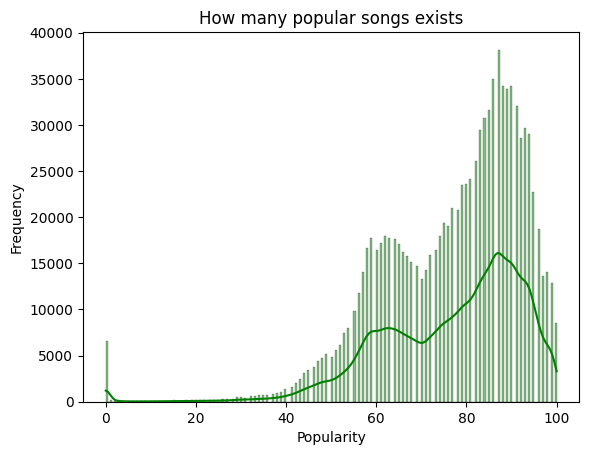

In [17]:
sns.histplot(data['popularity'], kde=True, color='green')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('How many popular songs exists')
plt.show()

In [18]:
pop_data = data[['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']]

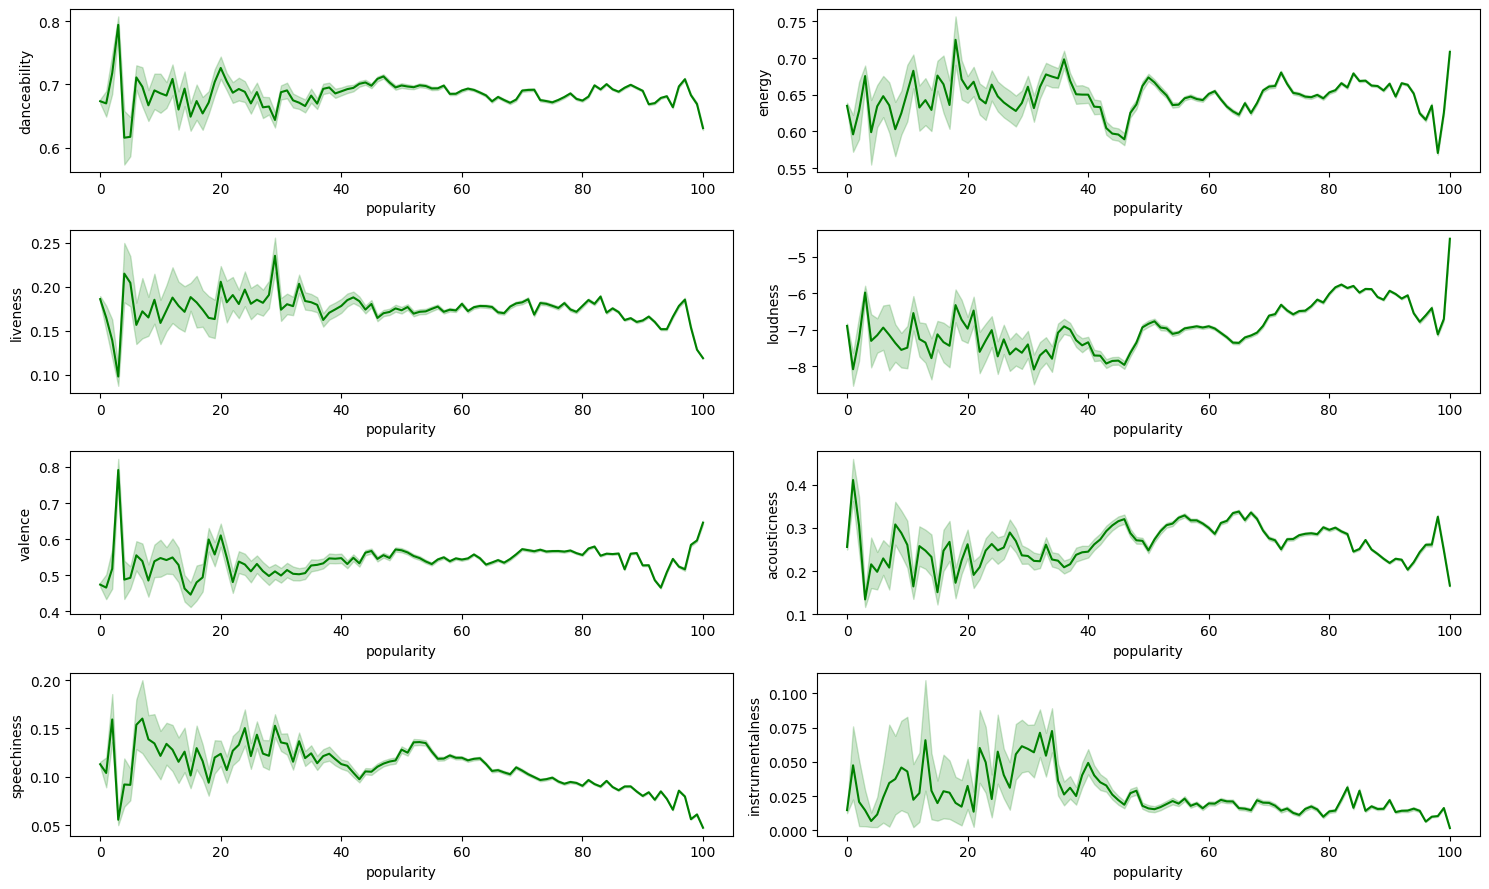

In [19]:
fig, axs = plt.subplots(4,2, figsize=(15,9))

colunas = ['danceability','energy', 'liveness','loudness','valence',
           "acousticness","speechiness",'instrumentalness']

axs = axs.flatten()
for ax, col in zip(axs, colunas):
    sns.lineplot(ax=ax, data=pop_data, x='popularity', y=col, color='green')

# Ajuste layout
plt.tight_layout()

# Mostre a figura
plt.show()

In [20]:
#Correlation by Pearson
corr_table = data[[ 'popularity',
       'is_explicit', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature']].corr(method="pearson")

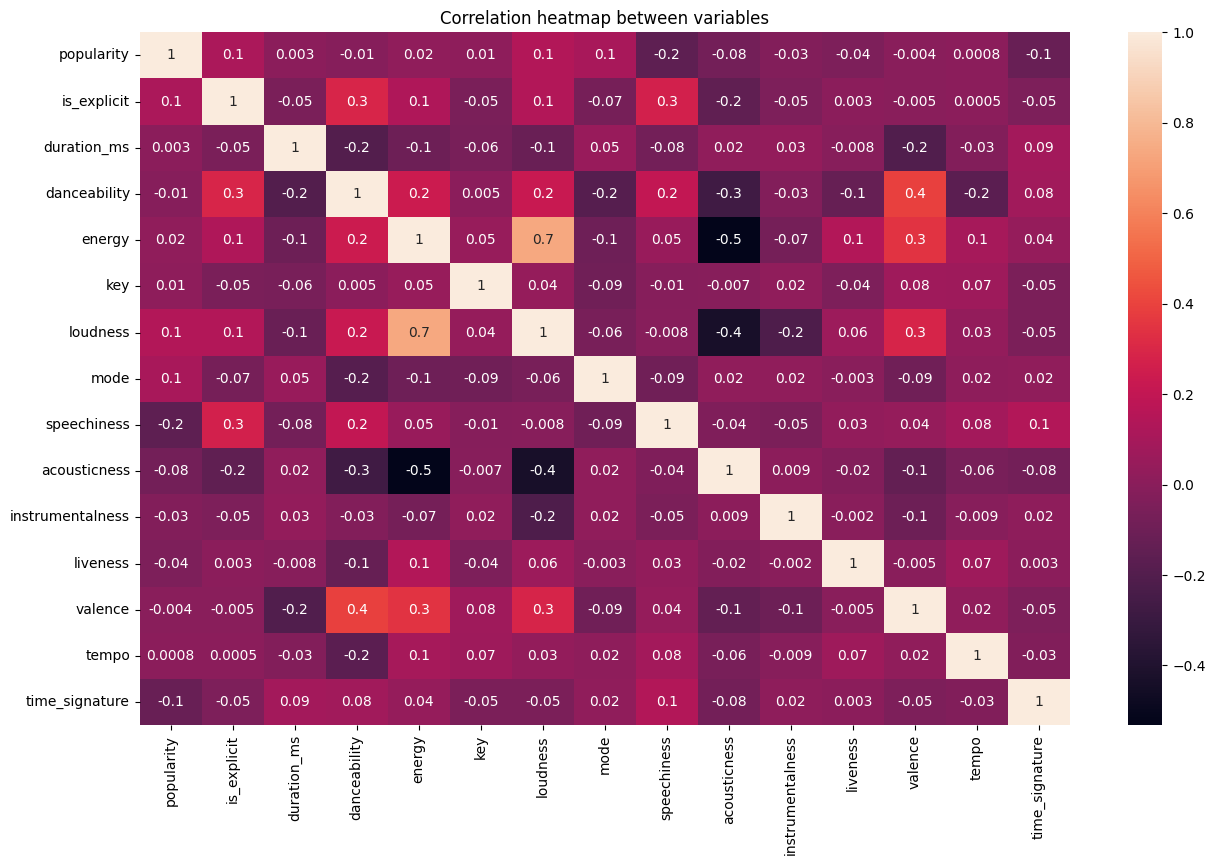

In [21]:
plt.figure(figsize=(15,9))
sns.heatmap(corr_table, annot=True, fmt='.1g')
plt.title("Correlation heatmap between variables")
plt.show()

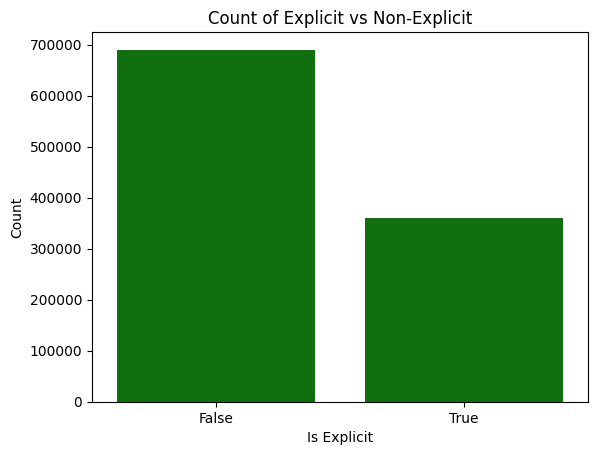

In [22]:
is_explicit_count = data[['name',"is_explicit"]].groupby("is_explicit").agg('count').reset_index()
sns.barplot(x='is_explicit', y='name', data=is_explicit_count, color='green')
plt.xlabel('Is Explicit')
plt.ylabel('Count')
plt.title('Count of Explicit vs Non-Explicit')
plt.show()

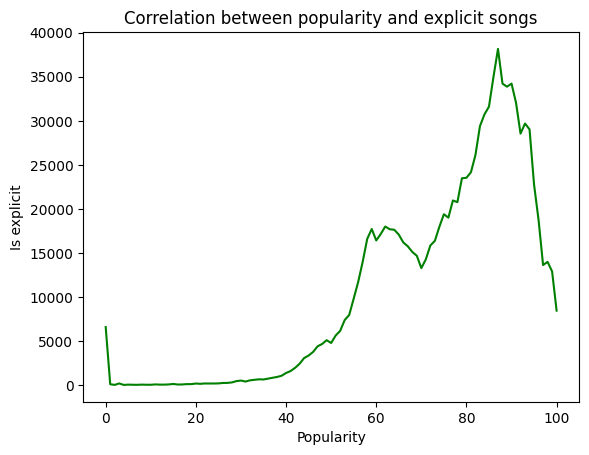

In [23]:
top_explicit = data[['popularity',"is_explicit"]].groupby("popularity").agg('count').reset_index()
graph_exp = sns.lineplot(data=top_explicit, x="popularity", y="is_explicit", color='green')
graph_exp.set(title='Correlation between popularity and explicit songs', xlabel='Popularity', ylabel='Is explicit');

In [24]:
data['duration_min'] = data['duration_ms'].apply(lambda tempo: tempo/60000)

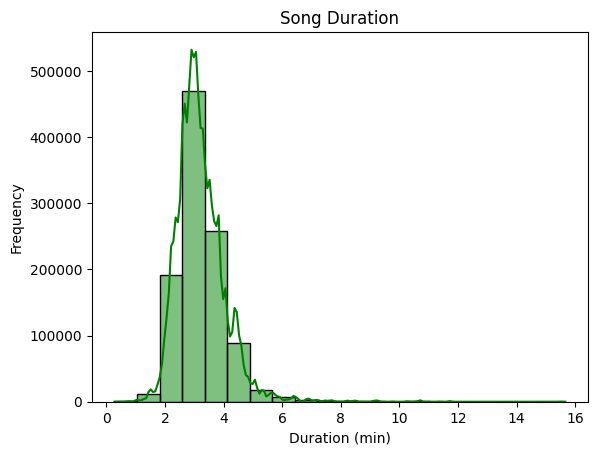

In [25]:
sns.histplot(data['duration_min'], bins=20, kde=True, color='green')
plt.title('Song Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.show()

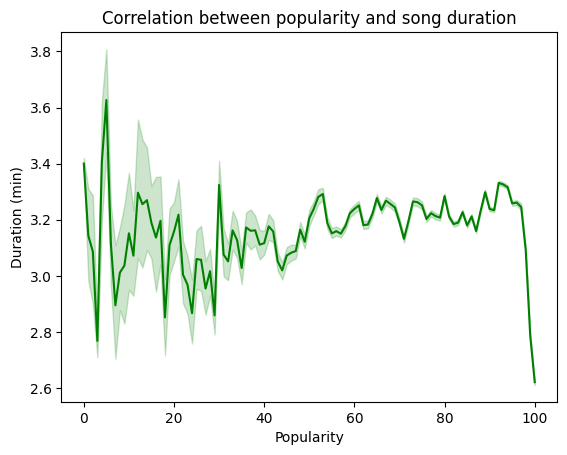

In [26]:
graph_exp = sns.lineplot(data, x="popularity", y="duration_min", color='green')
graph_exp.set(title='Correlation between popularity and song duration', xlabel='Popularity', ylabel='Duration (min)');

### 3.3. Trending Artists/Songs

In [27]:
top_artists = data['artists'].value_counts()
top_artists = pd.DataFrame(top_artists)
top_artists = top_artists.head(10)

<Figure size 1000x600 with 0 Axes>

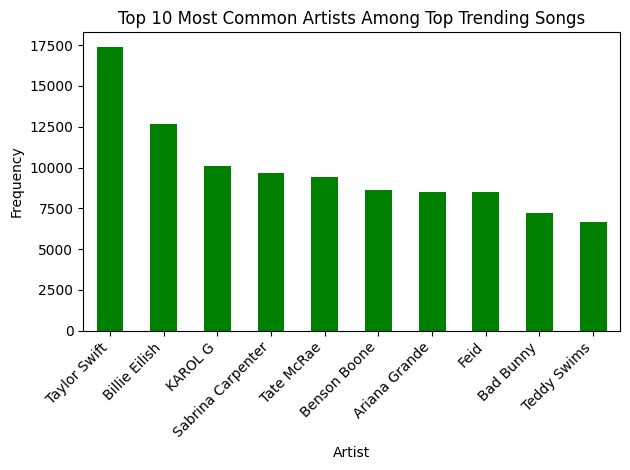

In [28]:
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='green')
plt.title('Top 10 Most Common Artists Among Top Trending Songs')
plt.xlabel('Artist')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.gca().legend_.remove() if plt.gca().legend_ else None
plt.tight_layout()
plt.show();

In [29]:
top_songs = data[["artist_song",'popularity']].loc[0:9].set_index('artist_song')

<Figure size 1200x800 with 0 Axes>

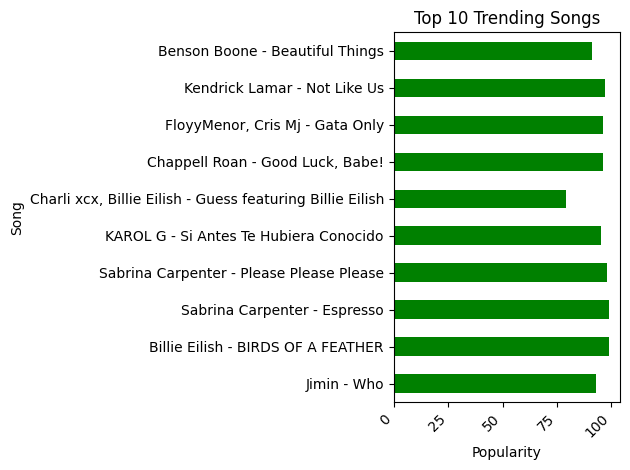

In [30]:
plt.figure(figsize=(12, 8))
top_songs.plot(kind='barh', color='green')
plt.title('Top 10 Trending Songs')
plt.xlabel('Popularity')
plt.ylabel('Song')
plt.xticks(rotation=45, ha='right')
plt.gca().legend_.remove() if plt.gca().legend_ else None
plt.tight_layout()
plt.show();

### 3.4. Songs Metrics

In [31]:
key_to_note = {
    0: "C",
    1: "C#/Db",
    2: "D",
    3: "D#/Eb",
    4: "E",
    5: "F",
    6: "F#/Gb",
    7: "G",
    8: "G#/Ab",
    9: "A",
    10: "A#/Bb",
    11: "B"
}

mode_to_note = {
    0: "Minor",
    1: "Major"
}

In [32]:
data['key_to_note'] = data['key'].map(key_to_note)
data['mode_to_note'] = data['mode'].map(mode_to_note)

In [33]:
mode_t = data[['key_to_note',"mode_to_note"]].groupby(["key_to_note",'mode_to_note']).value_counts().reset_index()

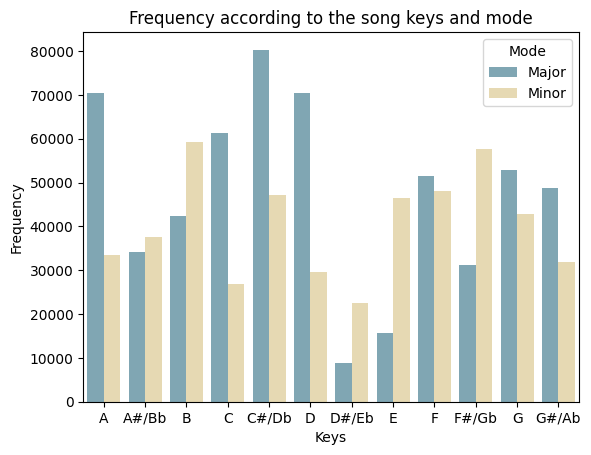

In [34]:
graph_bar_key = sns.barplot(data=mode_t, x="key_to_note", y='count', hue='mode_to_note', palette='blend:#7AB,#EDA')
graph_bar_key.set(title="Frequency according to the song keys and mode", xlabel="Keys", ylabel="Frequency")
graph_bar_key.legend(title="Mode")

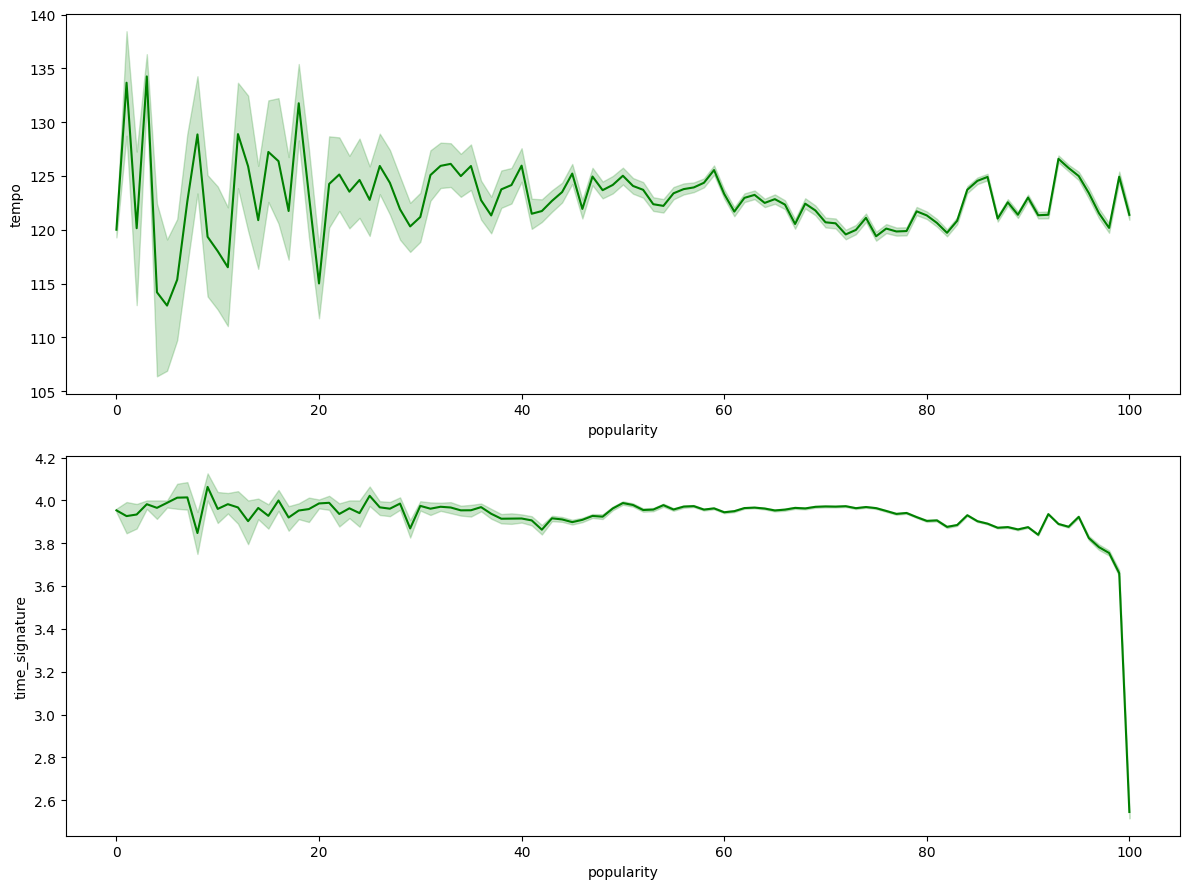

In [35]:
fig, axs = plt.subplots(2,1, figsize=(12,9))
colunas = ['tempo', 'time_signature']

axs = axs.flatten()
for ax, col in zip(axs, colunas):
    sns.lineplot(ax=ax, data=pop_data, x='popularity', y=col, color='green')

# Ajuste layout
plt.tight_layout()

# Mostre a figura
plt.show()

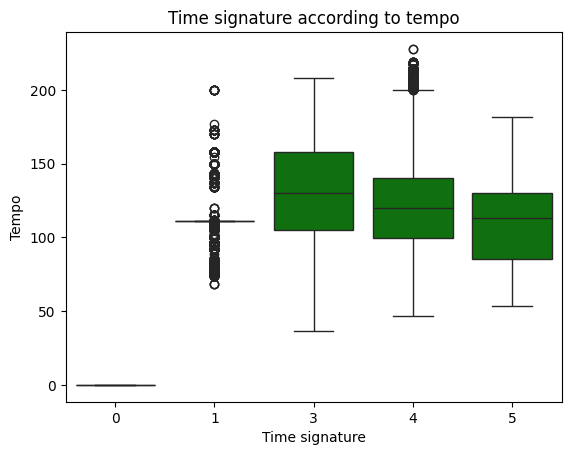

In [36]:
graph_box = sns.boxplot(y=data["tempo"], x=data["time_signature"], color='green')
graph_box.set(title="Time signature according to tempo", xlabel="Time signature", ylabel="Tempo");

In [37]:
data.to_csv('data.csv', index=False)

## **4. Machine Learning**

### 4.1. Train/Test

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
  pop_data.drop(['popularity'], axis=1), pop_data["popularity"],
   test_size=0.25,
  random_state=123
)

In [40]:
predictors_train

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1008956,220116,0.681,0.788,1,-4.323,1,0.0785,0.0482,0.0000,0.0753,0.839,170.019,4
635447,191700,0.569,0.882,3,-2.777,0,0.0600,0.0316,0.0000,0.1420,0.201,148.038,4
212440,253312,0.803,0.701,7,-5.838,1,0.1360,0.0297,0.0000,0.1160,0.266,95.004,4
747148,204426,0.661,0.623,1,-7.819,1,0.4250,0.3400,0.0000,0.0979,0.662,173.912,3
224289,119156,0.906,0.531,1,-7.545,1,0.2090,0.1830,0.0000,0.1160,0.228,125.917,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991345,111626,0.715,0.470,5,-12.638,0,0.0772,0.3530,0.0923,0.1040,0.426,89.965,4
194517,201935,0.794,0.729,4,-5.424,0,0.1110,0.1810,0.0000,0.1050,0.540,92.967,4
28051,172347,0.584,0.832,5,-3.789,1,0.0385,0.0289,0.0000,0.1310,0.690,171.691,4
278148,333986,0.467,0.392,9,-9.355,1,0.0908,0.2000,0.0174,0.1060,0.313,145.104,4


### 4.2. Finding best model

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score

In [42]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNearest': KNeighborsClassifier()
}

In [43]:
mae_results = {}
r2_results = {}
results = {}

In [44]:
for name, model in models.items():
    cv_scores = cross_val_score(model, predictors_train, target_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)

    # Training model for predictions
    model.fit(predictors_train, target_train)
    predictions = model.predict(predictors_train)

    # Metrics evaluation
    mae = mean_absolute_error(target_train, predictions)
    r2 = r2_score(target_train, predictions)
    results[name] = rmse_scores
    mae_results[name] = mae
    r2_results[name] = r2

    print(f"{name} - RMSE: {rmse_scores.mean()} -Standart Deviation: {rmse_scores.std()}")
    print(f"{name} - MAE: {mae:.2f} - R²: {r2:.2f}")

Linear Regression - RMSE: 15.371180509803631 -Standart Deviation: 0.051876759391895115
Linear Regression - MAE: 11.88 - R²: 0.08
Ridge - RMSE: 15.37118050207294 -Standart Deviation: 0.051877413578989756
Ridge - MAE: 11.88 - R²: 0.08
Lasso - RMSE: 15.865941853583957 -Standart Deviation: 0.055467653819845204
Lasso - MAE: 12.55 - R²: 0.02
Random Forest - RMSE: 7.22579864427072 -Standart Deviation: 0.04140018549076971
Random Forest - MAE: 3.12 - R²: 0.82
Decision Tree - RMSE: 8.930840851962753 -Standart Deviation: 0.07195842499030203
Decision Tree - MAE: 3.12 - R²: 0.72
KNearest - RMSE: 11.79731869189241 -Standart Deviation: 0.6407144304539604
KNearest - MAE: 4.38 - R²: 0.53


### 4.3. Training best model

In [52]:
pip install --upgrade joblib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 53.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [86]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [54]:
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=200, num=10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 100, num=10)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [47]:
model = RandomForestRegressor(random_state=42)

In [56]:
halving_search = HalvingRandomSearchCV(
    estimator=model,
    param_distributions=param_grid,
    factor=3,
    resource='n_samples',
    max_resources='auto',
    cv=2,
    verbose=2,
    random_state=42,
    n_jobs=1,  # Alterado para 1 para evitar paralelismo
    scoring='neg_mean_squared_error'
)

In [57]:
import joblib
try:
    joblib.dump(model, 'model.pkl')
    joblib.load('model.pkl')
except Exception as e:
    print(f"Erro ao serializar/deserializar: {e}")

In [58]:
halving_search.fit(predictors_train, target_train)

A saída de streaming foi truncada nas últimas 5000 linhas.
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=111; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=111; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=122; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=122; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=133; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimato

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


1980 fits failed out of a total of 5940.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1980 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    def _fit_and_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    # We need this because some estimators validate X and y
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 9

----------
iter: 1
n_candidates: 990
n_resources: 12
Fitting 2 folds for each of 990 candidates, totalling 1980 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=122; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=122; total time=   0.3s
[CV] END max_depth=70, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=122; total time=   0.3s
[CV] END max_depth=70, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=122; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=122; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=122; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=122; total time=   0.3s
[CV] END max_depth=10, max_features=log2

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning:

One or more of the test scores are non-finite: [          nan           nan           nan ... -498.66790133 -492.9695125
 -505.89797234]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning:

One or more of the train scores are non-finite: [          nan           nan           nan ... -126.81259028 -155.18117917
  -85.30181094]



----------
iter: 2
n_candidates: 330
n_resources: 36
Fitting 2 folds for each of 330 candidates, totalling 660 fits
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=177; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=177; total time=   0.2s
[CV] END max_depth=70, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=177; total time=   0.2s
[CV] END max_depth=70, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=177; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=177; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=177; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=177; total time=   0.2s
[CV] END max_depth=50, max_features=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning:

One or more of the test scores are non-finite: [          nan           nan           nan ... -432.83676228 -432.83676228
 -432.83676228]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning:

One or more of the train scores are non-finite: [          nan           nan           nan ... -251.74877075 -251.74877075
 -251.74877075]



----------
iter: 3
n_candidates: 110
n_resources: 108
Fitting 2 folds for each of 110 candidates, totalling 220 fits
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=111; total time=   0.2s
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=111; total time=   0.1s
[CV] END max_depth=90, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=111; total time=   0.1s
[CV] END max_depth=90, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=111; total time=   0.1s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=111; total time=   0.2s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=111; total time=   0.1s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=90, max_features=sqrt, m

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning:

One or more of the test scores are non-finite: [          nan           nan           nan ... -370.53341777 -369.25747241
 -369.25747241]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning:

One or more of the train scores are non-finite: [          nan           nan           nan ... -152.5743559  -164.29021524
 -164.29021524]



[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=60, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=122; total time=   0.2s
[CV] END max_depth=60, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=122; total time=   0.2s
[CV] END max_depth=None, max_features=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning:

One or more of the test scores are non-finite: [          nan           nan           nan ... -267.10967599 -267.10967599
 -267.10967599]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning:

One or more of the train scores are non-finite: [         nan          nan          nan ... -123.7214918 -123.7214918
 -123.7214918]



----------
iter: 5
n_candidates: 13
n_resources: 972
Fitting 2 folds for each of 13 candidates, totalling 26 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=122; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=122; total time=   0.3s
[CV] END max_depth=100, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=122; total time=   0.3s
[CV] END max_depth=100, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=122; total time=   0.3s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=122; total time=   0.3s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=122; total time=   0.3s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=122; total time=   0.3s
[CV] END max_depth=70, max_featur

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning:

One or more of the test scores are non-finite: [          nan           nan           nan ... -217.07075128 -212.34511494
 -212.34511494]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning:

One or more of the train scores are non-finite: [          nan           nan           nan ... -111.20784722 -101.46883408
 -101.46883408]



[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=122; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=122; total time=   0.5s
[CV] END max_depth=70, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=122; total time=   0.5s
[CV] END max_depth=70, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=122; total time=   0.7s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=122; total time=   0.8s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=122; total time=   0.8s
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=30, max_feature

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning:

One or more of the test scores are non-finite: [          nan           nan           nan ... -168.19391977 -165.05013893
 -165.05013893]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning:

One or more of the train scores are non-finite: [         nan          nan          nan ... -91.85559053 -86.50271785
 -86.50271785]



----------
iter: 7
n_candidates: 2
n_resources: 8748
Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning:

One or more of the test scores are non-finite: [          nan           nan           nan ... -165.05013893 -129.96886765
 -129.96886765]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning:

One or more of the train scores are non-finite: [         nan          nan          nan ... -86.50271785 -72.34704566
 -72.34704566]



HalvingRandomSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42),
                      n_jobs=1,
                      param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100,
                                                         None],
                                           'max_features': ['auto', 'sqrt',
                                                            'log2'],
                                           'min_samples_leaf': [1, 2, 4],
                                           'min_samples_split': [2, 5, 10],
                                           'n_estimators': [100, 111, 122, 133,
                                                            144, 155, 166, 177,
                                                            188, 200]},
                      random_state=42, scoring='neg_mean_squared_error',
                      verbose=2)

In [59]:
#Searching hyperparameters
best_params = halving_search.best_params_
print(f'Melhores hiperparâmetros: {best_params}')

Melhores hiperparâmetros: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80}


In [60]:
#Training model with best hyperparameters
best_model = halving_search.best_estimator_

In [61]:
#Testing the model
target_test_pred = best_model.predict(predictors_test)
target_train_pred = best_model.predict(predictors_train)

In [62]:
#Calculating errors
rmse_test = np.sqrt(mean_squared_error(target_test, target_test_pred))
rmse_train = np.sqrt(mean_squared_error(target_train, target_train_pred))
print(f'RMSE Test: {round(rmse_test, 4)}')
print(f'RMSE Train: {round(rmse_train, 4)}')

RMSE Test: 7.1682
RMSE Train: 7.0273


### 4.4. Evaluating model

In [77]:
new_data = {
  'duration_ms': 220116,
  'danceability': 0.681,
  'energy':0.788,
  'key': 1,
  'loudness': -4.323,
  'mode': 1,
  'speechiness': 0.0785,
  'acousticness': 0.0482,
   'instrumentalness': 0.0,
  'liveness': 0.0753,
  'valence': 0.839,
  'tempo': 170.019,
  'time_signature': 4
}

In [78]:
new_data = pd.DataFrame([new_data])

In [70]:
av_model = best_model.predict(new_data)
print(f'The popularity of this song is near: {av_model}')

The popularity of this song is near: [83.53426591]
